In [1]:
import cv2
import os
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import csv
import pandas as pd
import keras
from keras import models,Model
from keras.layers import Dense,GaussianNoise, Dropout,Input
%matplotlib inline

/home/joker/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/joker/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataSet = []
person = []
horiSet = []

count = 0
folder = "/home/joker/PycharmProjecta/ML_PCA_Image/MLFaceImages"
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (520, 520))
        img = img.flatten()
        img = np.ravel(img)
        if img is not None:
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person.append(numbers[0])
            horiSet.append(img.T)
            dataSet.append(img)
            count = count + 1

In [3]:
dataSet = np.array(dataSet)
test = pd.DataFrame(dataSet)

person = np.array(person)
test['id'] = person.transpose()

unique_person = test['id']
unique_person = np.array(unique_person)
unique_person = np.unique(unique_person)
key = range(len(unique_person))

roll_dict = dict( zip(unique_person, key))
# print(roll_dict)

mapped_roll = np.vectorize(roll_dict.get)(person)
# print(mapped_roll)
test['id'] = mapped_roll.transpose()

y = test['id'].values.astype('int64')
images = test.drop(['id'], axis=1, inplace=False)
x = (images.values).astype('uint8')
split_test_size = 0.30

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = split_test_size, random_state=13)
# print(test)

In [4]:
scalar = StandardScaler()
scalar.fit(X_train)
X_sc_train = scalar.transform(X_train)
X_sc_test = scalar.transform(X_test)

/home/joker/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
X_sc_train
X_sc_test.shape

(31, 270400)

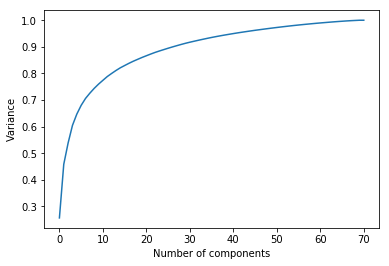

In [6]:
pca = PCA(n_components=5000)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance')

(71, 270400)
(31, 71)


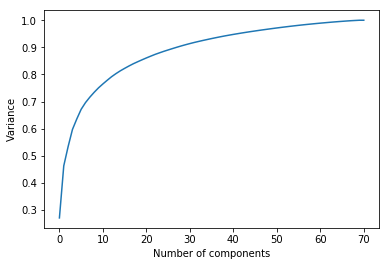

In [7]:
pca = PCA(n_components=10000)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)

pca_std = np.std(X_pca_train)
print(X_sc_train.shape)
print(X_pca_test.shape)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance')

In [8]:
model = models.Sequential()
layers = 1
units = 64

model.add(Dense(units, input_dim=71, activation='relu'))

for i in range(layers):
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(0.1))
model.add(Dense(len(mapped_roll), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Rmsprop', metrics=['accuracy'])
model.fit(X_pca_train, Y_train, batch_size=71, epochs=1000, verbose=2)

Epoch 1/1000
 - 1s - loss: 15.5862 - acc: 0.0000e+00
Epoch 2/1000
 - 0s - loss: 15.1486 - acc: 0.0563
Epoch 3/1000
 - 0s - loss: 14.9343 - acc: 0.0704
Epoch 4/1000
 - 0s - loss: 14.9830 - acc: 0.0704
Epoch 5/1000
 - 0s - loss: 14.8385 - acc: 0.0704
Epoch 6/1000
 - 0s - loss: 14.4457 - acc: 0.0845
Epoch 7/1000
 - 0s - loss: 13.9871 - acc: 0.0845
Epoch 8/1000
 - 0s - loss: 13.8707 - acc: 0.0845
Epoch 9/1000
 - 0s - loss: 13.4174 - acc: 0.1408
Epoch 10/1000
 - 0s - loss: 13.0323 - acc: 0.1831
Epoch 11/1000
 - 0s - loss: 12.5617 - acc: 0.1831
Epoch 12/1000
 - 0s - loss: 12.1910 - acc: 0.2254
Epoch 13/1000
 - 0s - loss: 12.4762 - acc: 0.2113
Epoch 14/1000
 - 0s - loss: 11.4565 - acc: 0.2676
Epoch 15/1000
 - 0s - loss: 11.2732 - acc: 0.2676
Epoch 16/1000
 - 0s - loss: 11.1921 - acc: 0.2817
Epoch 17/1000
 - 0s - loss: 11.1304 - acc: 0.2958
Epoch 18/1000
 - 0s - loss: 10.6737 - acc: 0.2958
Epoch 19/1000
 - 0s - loss: 10.8759 - acc: 0.3099
Epoch 20/1000
 - 0s - loss: 10.5939 - acc: 0.3239
Epoch

Epoch 167/1000
 - 0s - loss: 5.1114 - acc: 0.6761
Epoch 168/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 169/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 170/1000
 - 0s - loss: 4.9952 - acc: 0.6901
Epoch 171/1000
 - 0s - loss: 5.0207 - acc: 0.6761
Epoch 172/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 173/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 174/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 175/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 176/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 177/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 178/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 179/1000
 - 0s - loss: 4.9943 - acc: 0.6901
Epoch 180/1000
 - 0s - loss: 4.9943 - acc: 0.6901
Epoch 181/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 182/1000
 - 0s - loss: 4.9944 - acc: 0.6901
Epoch 183/1000
 - 0s - loss: 5.0316 - acc: 0.6761
Epoch 184/1000
 - 0s - loss: 4.8546 - acc: 0.6901
Epoch 185/1000
 - 0s - loss: 4.9950 - acc: 0.6901
Epoch 186/1000
 - 0s - loss: 4.9944 - acc: 0.6901


Epoch 331/1000
 - 0s - loss: 2.0431 - acc: 0.8732
Epoch 332/1000
 - 0s - loss: 2.0432 - acc: 0.8732
Epoch 333/1000
 - 0s - loss: 2.0490 - acc: 0.8732
Epoch 334/1000
 - 0s - loss: 2.0431 - acc: 0.8732
Epoch 335/1000
 - 0s - loss: 2.0531 - acc: 0.8732
Epoch 336/1000
 - 0s - loss: 2.0432 - acc: 0.8732
Epoch 337/1000
 - 0s - loss: 2.0432 - acc: 0.8732
Epoch 338/1000
 - 0s - loss: 2.0462 - acc: 0.8732
Epoch 339/1000
 - 0s - loss: 2.0432 - acc: 0.8732
Epoch 340/1000
 - 0s - loss: 2.0431 - acc: 0.8732
Epoch 341/1000
 - 0s - loss: 2.0432 - acc: 0.8732
Epoch 342/1000
 - 0s - loss: 2.0432 - acc: 0.8732
Epoch 343/1000
 - 0s - loss: 2.0431 - acc: 0.8732
Epoch 344/1000
 - 0s - loss: 2.0434 - acc: 0.8732
Epoch 345/1000
 - 0s - loss: 2.0432 - acc: 0.8732
Epoch 346/1000
 - 0s - loss: 2.0458 - acc: 0.8732
Epoch 347/1000
 - 0s - loss: 2.0432 - acc: 0.8732
Epoch 348/1000
 - 0s - loss: 2.0432 - acc: 0.8732
Epoch 349/1000
 - 0s - loss: 2.0432 - acc: 0.8732
Epoch 350/1000
 - 0s - loss: 2.0432 - acc: 0.8732


Epoch 495/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 496/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 497/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 498/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 499/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 500/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 501/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 502/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 503/1000
 - 0s - loss: 1.8163 - acc: 0.8873
Epoch 504/1000
 - 0s - loss: 1.8178 - acc: 0.8873
Epoch 505/1000
 - 0s - loss: 1.8163 - acc: 0.8873
Epoch 506/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 507/1000
 - 0s - loss: 1.8226 - acc: 0.8873
Epoch 508/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 509/1000
 - 0s - loss: 1.8279 - acc: 0.8873
Epoch 510/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 511/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 512/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 513/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 514/1000
 - 0s - loss: 1.8161 - acc: 0.8873


Epoch 659/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 660/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 661/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 662/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 663/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 664/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 665/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 666/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 667/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 668/1000
 - 0s - loss: 1.8162 - acc: 0.8873
Epoch 669/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 670/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 671/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 672/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 673/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 674/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 675/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 676/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 677/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 678/1000
 - 0s - loss: 1.8161 - acc: 0.8873


Epoch 823/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 824/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 825/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 826/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 827/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 828/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 829/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 830/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 831/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 832/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 833/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 834/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 835/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 836/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 837/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 838/1000
 - 0s - loss: 1.7964 - acc: 0.8873
Epoch 839/1000
 - 0s - loss: 1.6592 - acc: 0.8873
Epoch 840/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 841/1000
 - 0s - loss: 1.8161 - acc: 0.8873
Epoch 842/1000
 - 0s - loss: 1.5895 - acc: 0.9014


Epoch 987/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 988/1000
 - 0s - loss: 0.9114 - acc: 0.9437
Epoch 989/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 990/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 991/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 992/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 993/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 994/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 995/1000
 - 0s - loss: 0.9084 - acc: 0.9437
Epoch 996/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 997/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 998/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 999/1000
 - 0s - loss: 0.9081 - acc: 0.9437
Epoch 1000/1000
 - 0s - loss: 0.9081 - acc: 0.9437


In [9]:
predictions = model.predict_classes(X_pca_test, verbose=0)

def write_predictions(predictions, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions}).to_csv(fname, index=False, header=True)

write_predictions(predictions, "pca-keras-mlp.csv")

In [11]:
result = pd.read_csv('pca-keras-mlp.csv')
result = result['Label']
result = np.array(result)

error = np.array( Y_test - result)
error = error[error != 0]

error = error.size/Y_test.size
print("Accuracy: ",1-error)

Accuracy:  0.8387096774193549
